## Importations

In [140]:
# Importations
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
# Plot styler
def plt_style(titlesize=16,
              labelsize=14,
              legendsize=12,
              fontsize=14,
              figsize=(15,10)):
    # Font sizes
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = labelsize
    plt.rcParams['axes.titlesize'] = titlesize
    plt.rcParams['xtick.labelsize'] = labelsize
    plt.rcParams['ytick.labelsize'] = labelsize
    plt.rcParams['legend.fontsize'] = fontsize
    plt.rcParams['figure.titlesize'] = titlesize

    # Figure size
    plt.figure(1)
    plt.figure(figsize = figsize) 

    # axes
    ax = plt.subplot(111)                    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    
    # Return axis
    return ax

# Data

In [4]:
# Results
RESULTS_PATH = os.path.join('..', 'results')
DF = pd.read_excel(os.path.join(RESULTS_PATH, 'ClassProbs.xls'))
print(DF.shape)
DF.head()

(17579, 34)


,Index,ID,ProbNF,ProbF,y,yhat,Correct,Lat,Long,n_inc,...,Class2,Class3,n_comp,n_comp8,n_inc_fut,future_fire,same_cat_past_future,fire_past_and_future,no_fire_past_and_fire_future,fire_past_or_future
0,0,0,0.05,0.95,1,1,1,-34.95737,-71.23599,1,...,1,1,101,95,0,0,0,0,0,1
1,1,1,0.03,0.97,1,1,1,-35.74074,-72.54228,1,...,1,1,151,135,0,0,0,0,0,1
2,2,2,1.00,0.00,0,0,1,-39.08127,-72.69741,0,...,0,0,120,113,0,0,1,0,0,0
3,3,3,1.00,0.00,0,0,1,-33.63171,-70.74399,0,...,0,0,119,107,0,0,1,0,0,0
4,4,4,0.98,0.02,0,0,1,-39.35782,-72.66719,0,...,0,0,61,53,0,0,1,0,0,0


# Order by descending $P(Fire)$

In [201]:
# Sort
DFS = DF.sort_values('ProbF', ascending=False)
DFS.head()

,Index,ID,ProbNF,ProbF,y,yhat,Correct,Lat,Long,n_inc,...,Class2,Class3,n_comp,n_comp8,n_inc_fut,future_fire,same_cat_past_future,fire_past_and_future,no_fire_past_and_fire_future,fire_past_or_future
3261,3261,3261,0.0,1.0,1,1,1,-37.08133,-72.43472,3,...,2,1,143,128,4,1,1,1,0,1
13693,13693,13693,0.0,1.0,1,1,1,-32.72046,-71.49327,1,...,1,1,224,200,0,0,0,0,0,1
13977,13977,13977,0.0,1.0,1,1,1,-36.16709,-71.84032,1,...,1,1,131,115,1,1,1,1,0,1
13930,13930,13930,0.0,1.0,1,1,1,-38.50323,-72.44586,1,...,1,1,115,98,0,0,0,0,0,1
7098,7098,7098,0.0,1.0,1,1,1,-40.34848,-72.94382,2,...,1,1,139,127,2,1,1,1,0,1


<Figure size 432x288 with 0 Axes>

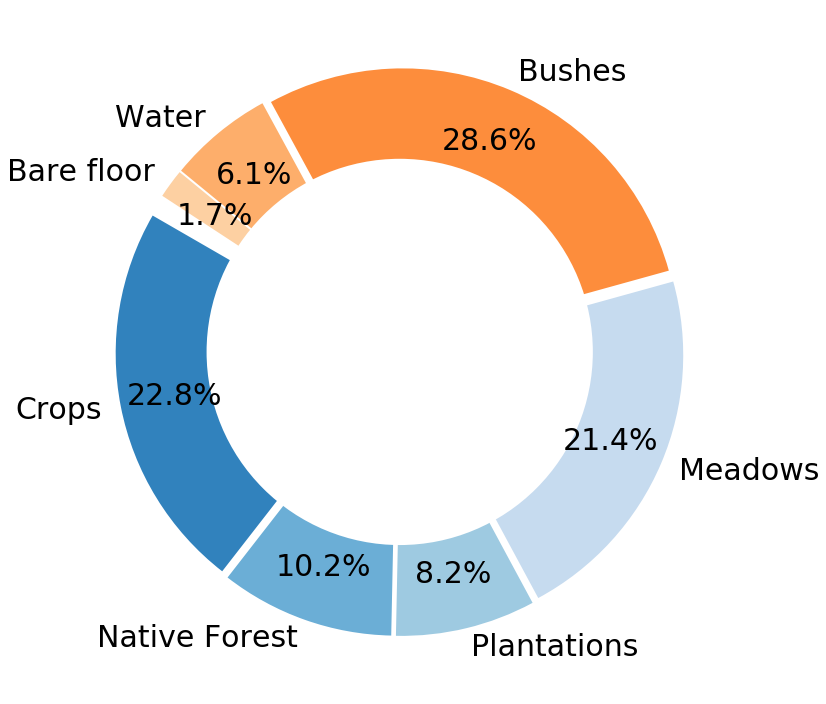

In [203]:
# Get frequency for a row
R = DFS[lcovers].sum() / DFS.shape[0]
R = R[R > 0.01]
R.index = [LCoverDict[i] for i in R.index]

# Colors from CMAP
cmap = plt.get_cmap("tab20c")
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=16.0)
Tabcolors = [cmap(norm(v)) for v in range(0, len(R))]
Tabcolors = np.array(Tabcolors)
colors = Tabcolors

angle = 150
ax = plt_style()
explode = [0.03 for i in range(R.shape[0])]
R.plot(kind='pie',
       y='freq',
       ax=ax,
       autopct='%1.1f%%', 
       startangle=angle,
       fontsize=30,
       pctdistance=.8,
       explode=explode,
       colors=colors,
       labeldistance=1.07)
plt.title('')
#ax.get_legend().remove()
plt.ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('All_Samples_LCover.pdf', dpi=300)

# Risk

In [104]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Set2')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(lcovers) - 1)

In [59]:
# Categories
DFS.eval('risk_level = 3 * (ProbF >= .7) + 2 * (ProbF < .3) + 1 * ((ProbF < .7) & (ProbF >= .3))', 
         inplace=True) 
DFS

,Index,ID,ProbNF,ProbF,y,yhat,Correct,Lat,Long,n_inc,...,Class3,n_comp,n_comp8,n_inc_fut,future_fire,same_cat_past_future,fire_past_and_future,no_fire_past_and_fire_future,fire_past_or_future,risk_level
3261,3261,3261,0.0,1.0,1,1,1,-37.08133,-72.43472,3,...,1,143,128,4,1,1,1,0,1,3
13693,13693,13693,0.0,1.0,1,1,1,-32.72046,-71.49327,1,...,1,224,200,0,0,0,0,0,1,3
13977,13977,13977,0.0,1.0,1,1,1,-36.16709,-71.84032,1,...,1,131,115,1,1,1,1,0,1,3
13930,13930,13930,0.0,1.0,1,1,1,-38.50323,-72.44586,1,...,1,115,98,0,0,0,0,0,1,3
7098,7098,7098,0.0,1.0,1,1,1,-40.34848,-72.94382,2,...,1,139,127,2,1,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,4202,4202,1.0,0.0,0,0,1,-32.41233,-71.06100,0,...,0,71,57,0,0,1,0,0,0,2
11745,11745,11745,1.0,0.0,0,0,1,-38.21204,-72.36876,0,...,0,108,96,0,0,1,0,0,0,2
11744,11744,11744,1.0,0.0,0,0,1,-30.02383,-70.74244,0,...,0,43,38,0,0,1,0,0,0,2
11742,11742,11742,1.0,0.0,0,0,1,-34.89007,-71.16389,0,...,0,42,39,0,0,1,0,0,0,2


## High risk

In [68]:
HR = DFS[DFS.ProbF >= .7]
features = ['Lat','Long', 'n_inc', 'n_comp', 'n_comp8']
HR[features].describe()

,Lat,Long,n_inc,n_comp,n_comp8
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,-35.883509,-72.020292,2.822164,133.096834,118.037995
std,2.513297,0.862633,6.601345,53.129772,45.909065
min,-43.204210,-73.819140,0.000000,10.000000,10.000000
25%,-37.629238,-72.725265,1.000000,96.000000,86.000000
50%,-36.084605,-71.980650,1.000000,128.000000,113.000000
75%,-33.568550,-71.279588,3.000000,166.000000,147.000000
max,-29.853840,-70.269120,175.000000,388.000000,322.000000


In [186]:
lcovers = ['lcV' + str(i) for i in range(0, 11)]
HR[lcovers].describe()

,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,lcV6,lcV7,lcV8,lcV9,lcV10
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,0.000358,0.158948,0.103232,0.128983,0.202522,0.296375,0.000704,0.010049,0.082933,0.015778,0.000014
std,0.004561,0.210654,0.131008,0.209179,0.192379,0.215285,0.003630,0.042325,0.141305,0.037881,0.000244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.008065,0.011445,0.000000,0.054431,0.119088,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.050976,0.051743,0.014994,0.136129,0.251552,0.000000,0.000000,0.010286,0.001106,0.000000
75%,0.000000,0.249930,0.146818,0.166339,0.304360,0.441913,0.000000,0.001086,0.097712,0.012535,0.000000
max,0.095778,0.939258,0.838191,0.965286,0.967213,0.980437,0.069954,0.491170,0.805702,0.517123,0.006550


In [187]:
# Proportions (check)
HR[lcovers].sum() / HR.shape[0]

lcV0     0.000358
lcV1     0.158948
lcV2     0.103232
lcV3     0.128983
lcV4     0.202522
lcV5     0.296375
lcV6     0.000704
lcV7     0.010049
lcV8     0.082933
lcV9     0.015778
lcV10    0.000014
dtype: float64

Text(0.5, 1.0, 'High-risk: average landcover proportions')

<Figure size 432x288 with 0 Axes>

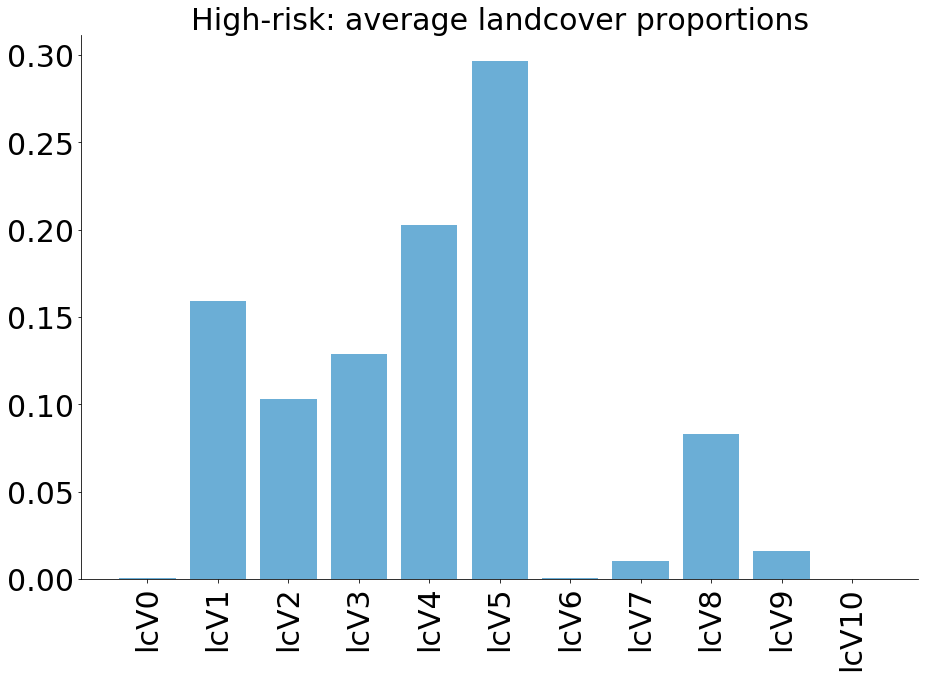

In [191]:
plt_style(fontsize=30, labelsize=30, titlesize=30)
plt.bar(x=lcovers, height=HR[lcovers].describe().iloc[1,:].values, fc=cmap(1))
plt.xticks(rotation=90)
plt.title("High-risk: average landcover proportions")

In [194]:
# Land cover dictionary
LCoverDict = {'lcV0':'NData',
              'lcV1': 'Crops',
              'lcV2': 'Native Forest',
              'lcV3': 'Plantations',
              'lcV4': 'Meadows',
              'lcV5': 'Bushes',
              'lcV6': 'Wetlands',
              'lcV7': 'Water bodies',
              'lcV8': 'Water',
              'lcV9': 'Bare floor',
              'lcV10': 'Snow',
              'lcV11': 'Clouds',}

<Figure size 432x288 with 0 Axes>

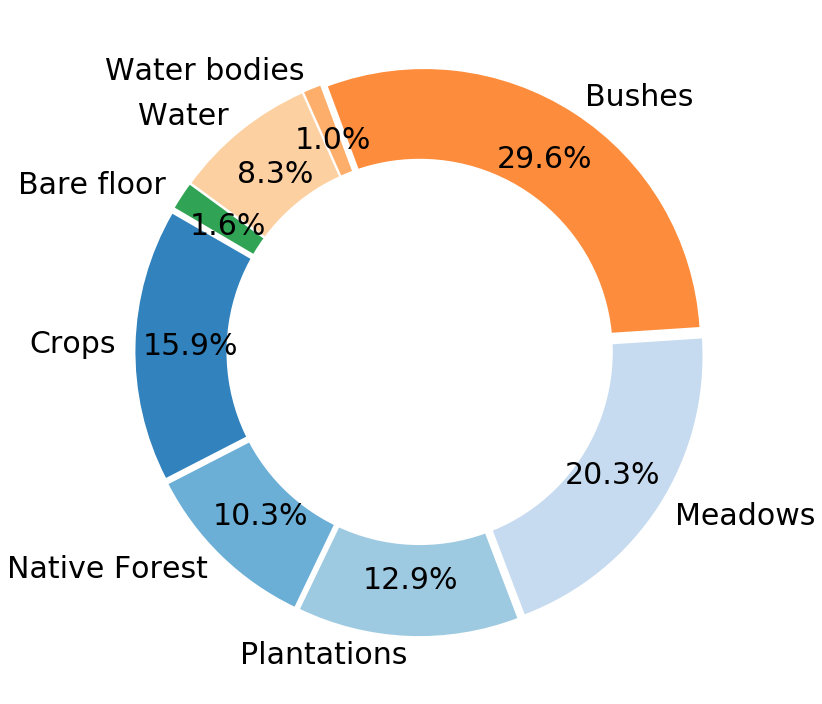

In [204]:
# Get frequency for a row
R = HR[lcovers].sum() / HR.shape[0]
R = R[R > 0.01]
R.index = [LCoverDict[i] for i in R.index]

# Colors from CMAP
cmap = plt.get_cmap("tab20c")
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=16.0)
Tabcolors = [cmap(norm(v)) for v in range(0, len(R))]
Tabcolors = np.array(Tabcolors)
colors = Tabcolors

angle = 150
ax = plt_style()
explode = [0.03 for i in range(R.shape[0])]
R.plot(kind='pie',
       y='freq',
       ax=ax,
       autopct='%1.1f%%', 
       startangle=angle,
       fontsize=30,
       pctdistance=.8,
       explode=explode,
       colors=colors,
       labeldistance=1.07)
plt.title('')
#ax.get_legend().remove()
plt.ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('HR_Samples_LCover.pdf', dpi=300)

## Medium risk

In [70]:
MR = DFS[(DFS.ProbF >= .3) & (DFS.ProbF < .7)]
MR[features].describe()

,Lat,Long,n_inc,n_comp,n_comp8
count,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000
mean,-36.055007,-71.946626,0.315037,115.768439,103.036592
std,2.780677,0.905439,1.612915,55.792292,48.375992
min,-43.203480,-73.809790,0.000000,3.000000,3.000000
25%,-38.143110,-72.678040,0.000000,75.000000,68.000000
50%,-36.160030,-71.967730,0.000000,107.000000,96.000000
75%,-33.526660,-71.213310,0.000000,149.000000,131.000000
max,-29.856520,-70.259590,40.000000,397.000000,326.000000


In [72]:
MR[lcovers].describe()

,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,lcV6,lcV7,lcV8,lcV9,lcV10
count,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000
mean,0.000508,0.125746,0.116745,0.117263,0.227489,0.310104,0.001106,0.009927,0.070377,0.020625,0.000017
std,0.005651,0.209182,0.169247,0.208666,0.230716,0.254624,0.008228,0.041744,0.156188,0.060936,0.000556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.002225,0.006849,0.000000,0.043908,0.100811,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.023864,0.043678,0.005855,0.134793,0.236571,0.000000,0.000000,0.001152,0.000000,0.000000
75%,0.000000,0.121453,0.157471,0.132258,0.360934,0.474286,0.000000,0.000000,0.040704,0.009657,0.000000
max,0.096774,0.954802,0.853789,1.000000,0.933953,1.000000,0.187764,0.434197,0.842529,0.683180,0.022857


Text(0.5, 1.0, 'Medium-risk: average landcover proportions')

<Figure size 432x288 with 0 Axes>

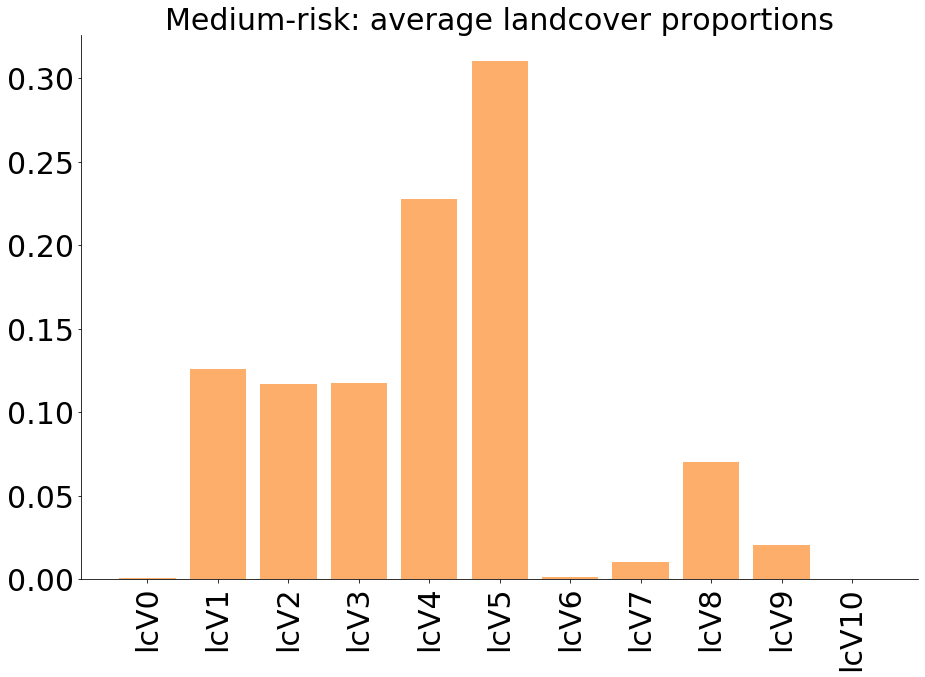

In [197]:
plt_style(fontsize=30, labelsize=30, titlesize=30)
plt.bar(x=lcovers, height=MR[lcovers].describe().iloc[1,:].values, fc=cmap(6))
plt.xticks(rotation=90)
plt.title("Medium-risk: average landcover proportions")

<Figure size 432x288 with 0 Axes>

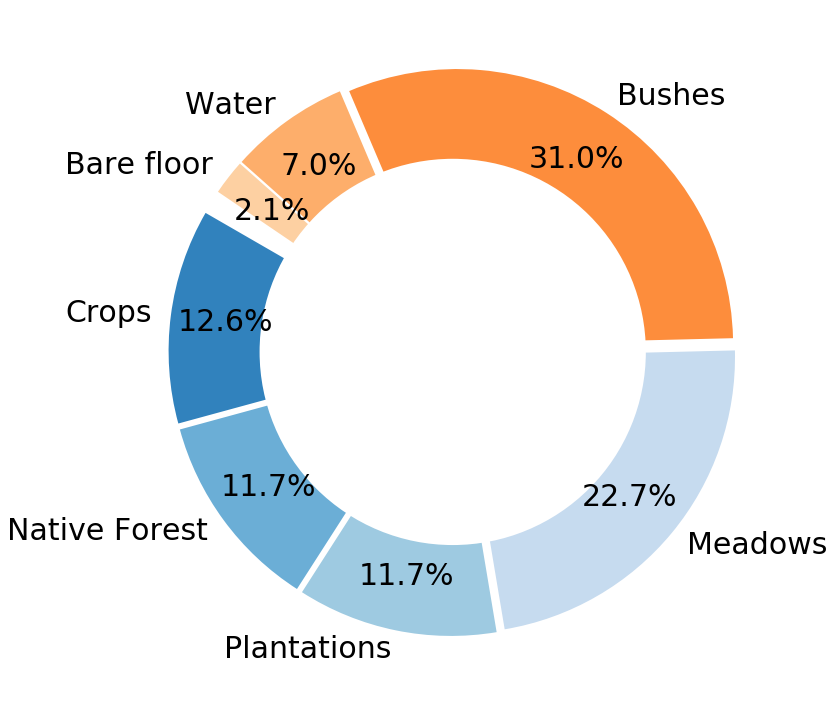

In [205]:
# Get frequency for a row
R = MR[lcovers].sum() / MR.shape[0]
R = R[R > 0.01]
R.index = [LCoverDict[i] for i in R.index]

# Colors from CMAP
cmap = plt.get_cmap("tab20c")
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=16.0)
Tabcolors = [cmap(norm(v)) for v in range(0, len(R))]
Tabcolors = np.array(Tabcolors)
colors = Tabcolors

angle = 150
ax = plt_style()
explode = [0.03 for i in range(R.shape[0])]
R.plot(kind='pie',
       y='freq',
       ax=ax,
       autopct='%1.1f%%', 
       startangle=angle,
       fontsize=30,
       pctdistance=.8,
       explode=explode,
       colors=colors,
       labeldistance=1.07)
plt.title('')
#ax.get_legend().remove()
plt.ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('MR_Samples_LCover.pdf', dpi=300)

## Low risk

In [106]:
LR = DFS[DFS.ProbF < .3]
LR[features].describe()

,Lat,Long,n_inc,n_comp,n_comp8
count,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000
mean,-35.811119,-71.738448,0.018937,99.324834,88.551827
std,2.795951,0.888874,0.300853,54.913157,47.706991
min,-43.203820,-73.864450,0.000000,1.000000,1.000000
25%,-38.115983,-72.498175,0.000000,59.000000,53.000000
50%,-34.948970,-71.577655,0.000000,92.000000,83.000000
75%,-33.616040,-70.941975,0.000000,130.000000,116.000000
max,-29.844350,-70.251270,13.000000,411.000000,349.000000


In [107]:
LR[lcovers].describe()

,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,lcV6,lcV7,lcV8,lcV9,lcV10
count,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000,12040.000000
mean,0.000329,0.264773,0.099336,0.062082,0.216117,0.279766,0.000537,0.006980,0.053245,0.016772,0.000012
std,0.004502,0.303876,0.158323,0.161874,0.260073,0.253874,0.004722,0.038533,0.144926,0.056494,0.000420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.005445,0.005714,0.000000,0.022676,0.083900,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.108455,0.034501,0.001116,0.085107,0.195701,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.518572,0.116783,0.021322,0.353854,0.404256,0.000000,0.000000,0.016602,0.004571,0.000000
max,0.099099,0.987585,1.000000,1.000000,1.000000,1.000000,0.320180,0.499471,0.950317,0.889522,0.026528


Text(0.5, 1.0, 'Low-risk: average landcover proportions')

<Figure size 432x288 with 0 Axes>

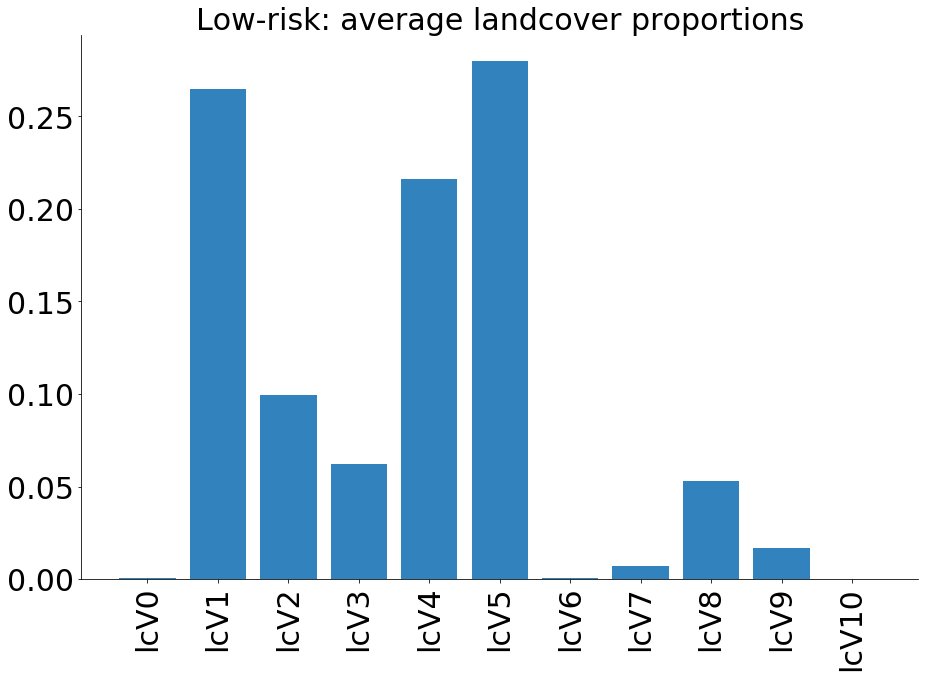

In [199]:
plt_style(fontsize=30, labelsize=30, titlesize=30)
plt.bar(x=lcovers, height=LR[lcovers].describe().iloc[1,:].values, fc=cmap(0))
plt.xticks(rotation=90)
plt.title("Low-risk: average landcover proportions")

<Figure size 432x288 with 0 Axes>

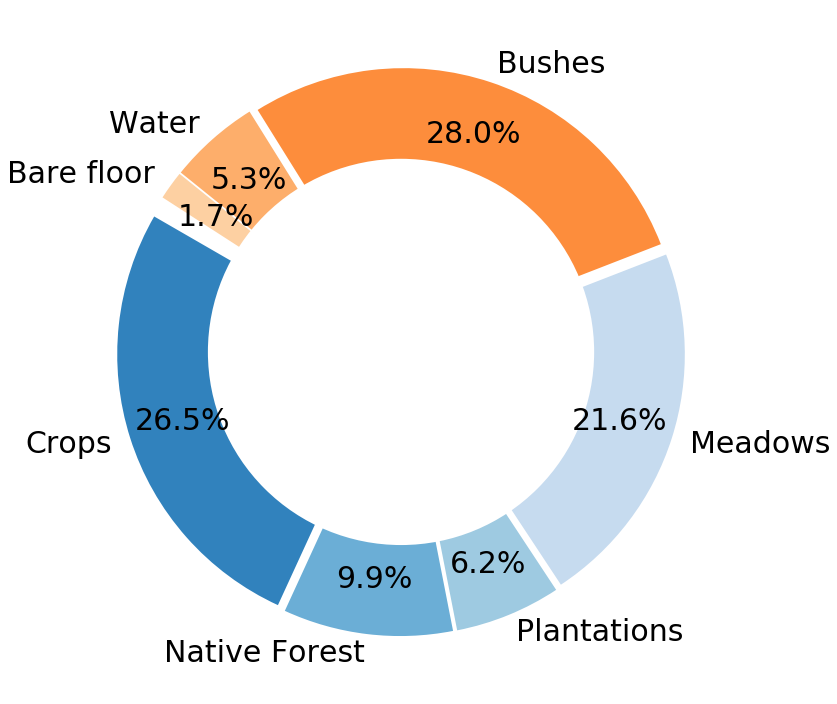

In [206]:
# Get frequency for a row
R = LR[lcovers].sum() / LR.shape[0]
R = R[R > 0.01]
R.index = [LCoverDict[i] for i in R.index]

# Colors from CMAP
cmap = plt.get_cmap("tab20c")
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=16.0)
Tabcolors = [cmap(norm(v)) for v in range(0, len(R))]
Tabcolors = np.array(Tabcolors)
colors = Tabcolors

angle = 150
ax = plt_style()
explode = [0.03 for i in range(R.shape[0])]
R.plot(kind='pie',
       y='freq',
       ax=ax,
       autopct='%1.1f%%', 
       startangle=angle,
       fontsize=30,
       pctdistance=.8,
       explode=explode,
       colors=colors,
       labeldistance=1.07)
plt.title('')
#ax.get_legend().remove()
plt.ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('LR_Samples_LCover.pdf', dpi=300)

## Plots

<Figure size 432x288 with 0 Axes>

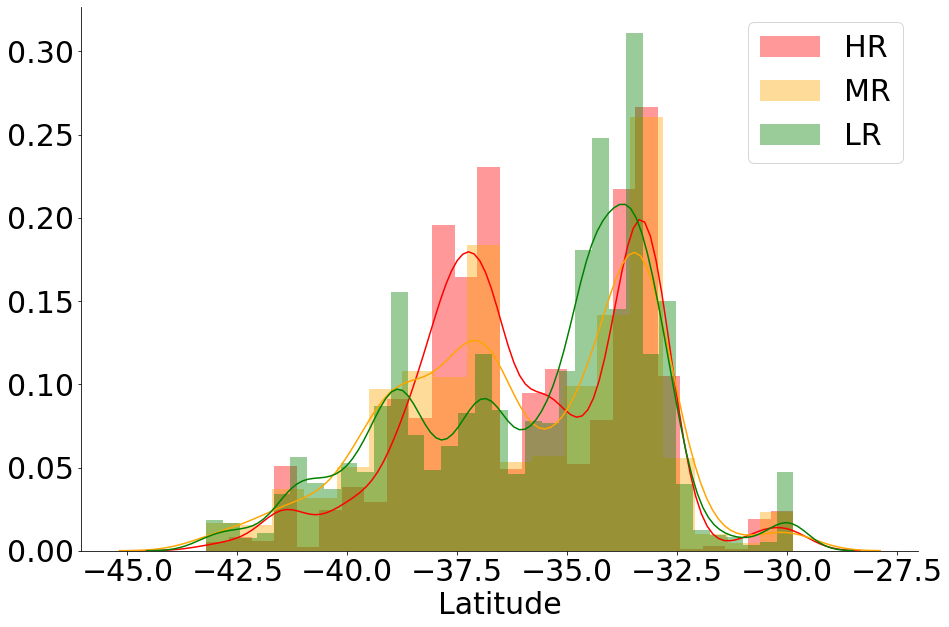

In [207]:
# Latitude
plt_style(fontsize=30, labelsize=30, titlesize=30)
var = 'Lat'
sns.distplot(HR[var], color='red', label='HR')
sns.distplot(MR[var], color='orange', label='MR')
sns.distplot(LR[var], color='green', label='LR')
plt.legend()
#plt.title('Density plot')
plt.xlabel('Latitude')
plt.savefig('Latitud_Density.pdf', dpi=300)

<Figure size 432x288 with 0 Axes>

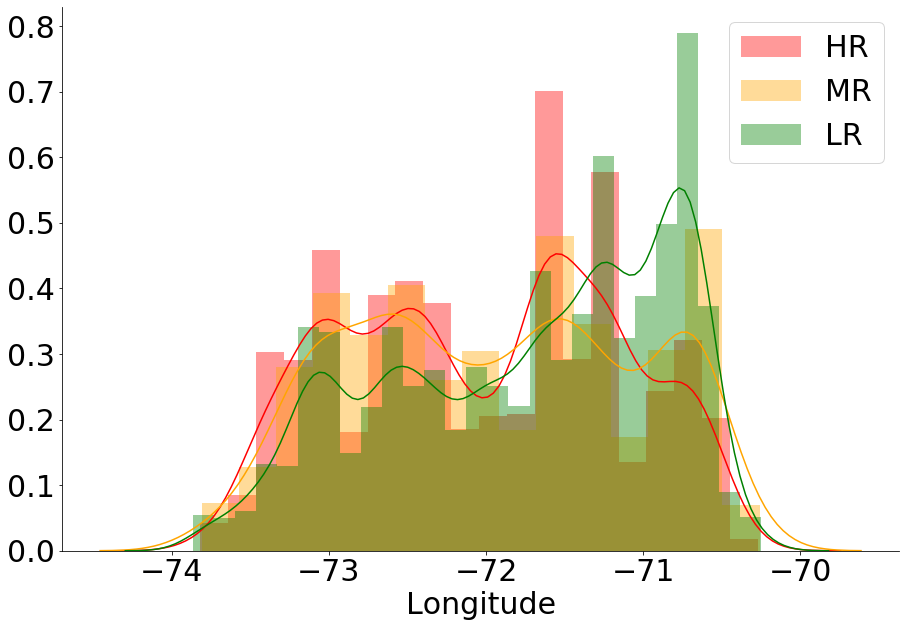

In [209]:
# Longitude
var = 'Long'
plt_style(fontsize=30, labelsize=30, titlesize=30)
sns.distplot(HR[var], color='red', label='HR')
sns.distplot(MR[var], color='orange', label='MR')
sns.distplot(LR[var], color='green', label='LR')
plt.legend()
#plt.title('Density plot')
plt.xlabel('Longitude')
plt.savefig('Longitude_Density.pdf', dpi=300)

<Figure size 432x288 with 0 Axes>

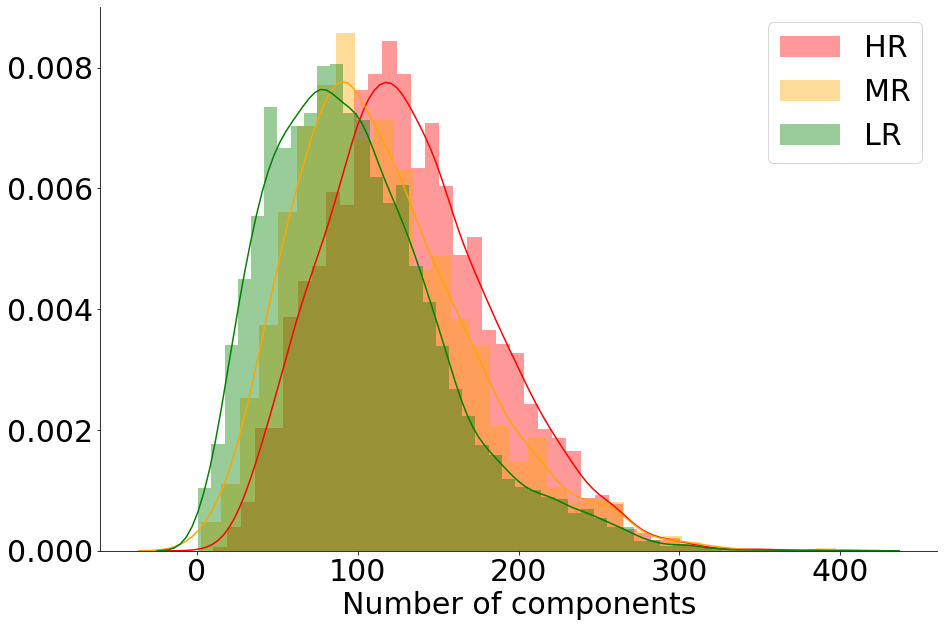

In [210]:
# Ncomp
var = 'n_comp'
plt_style(fontsize=30, labelsize=30, titlesize=30)
sns.distplot(HR[var], color='red', label='HR')
sns.distplot(MR[var], color='orange', label='MR')
sns.distplot(LR[var], color='green', label='LR')
plt.legend()
#plt.title('Density plot')
plt.xlabel('Number of components')
plt.savefig('NComponents_Density.pdf', dpi=300)

<Figure size 432x288 with 0 Axes>

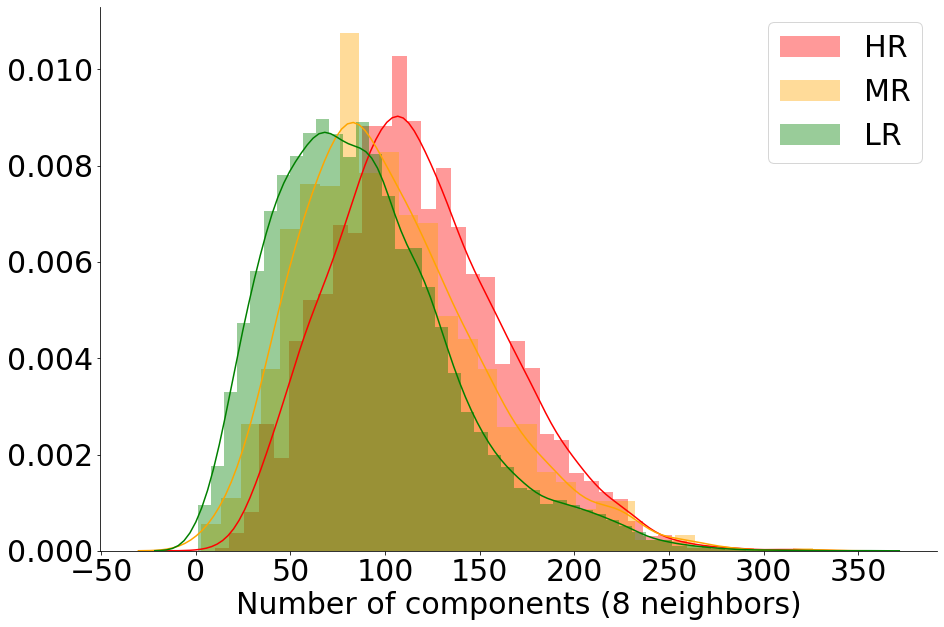

In [212]:
# Ncomp2
var = 'n_comp8'
plt_style(fontsize=30, labelsize=30, titlesize=30)
sns.distplot(HR[var], color='red', label='HR')
sns.distplot(MR[var], color='orange', label='MR')
sns.distplot(LR[var], color='green', label='LR')
plt.legend()
#plt.title('Density plot')
plt.xlabel('Number of components (8 neighbors)')
plt.savefig('NComponents8_Density.pdf', dpi=300)

<Figure size 432x288 with 0 Axes>

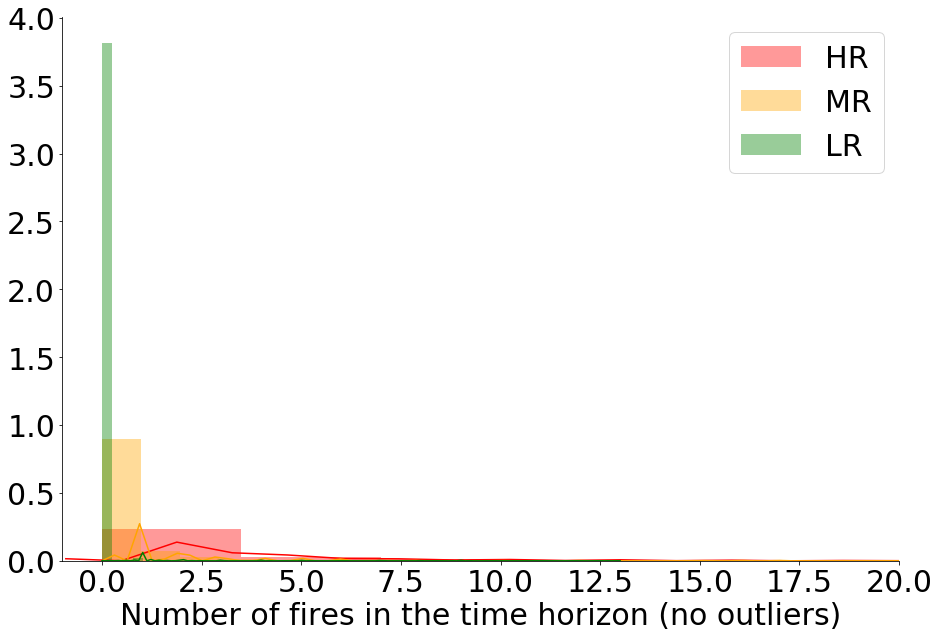

In [221]:
# Ninc
var = 'n_inc'
plt_style(fontsize=30, labelsize=30, titlesize=30)
sns.distplot(HR[var], color='red', label='HR')
sns.distplot(MR[var], color='orange', label='MR')
sns.distplot(LR[var], color='green', label='LR')
plt.legend()
plt.xlim([-1,20])
#plt.title('Density plot')
plt.xlabel('Number of fires in the time horizon (no outliers)')
plt.savefig('ninc_Density.pdf', dpi=300)
